In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

e:\conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
PATH = "oat_data_csv.csv"
d = pd.read_csv(PATH)

d

,year,pIV,pV,pVI,pVII,pIV-VII,tIV,tV,tVI,tVII,tIV-VII,yields
0,1985,21.5,46.8,59.5,24.5,152.3,7.5,14.9,14.3,18.0,13.7,41.40
1,1986,32.6,53.3,83.7,56.8,226.4,7.4,14.7,16.2,18.0,14.4,58.80
2,1987,28.0,26.0,82.3,111.3,247.6,8.0,10.9,15.0,17.1,12.8,57.40
3,1988,28.9,23.3,151.5,103.3,307.0,8.0,15.4,16.5,18.7,14.7,30.70
4,1989,25.9,8.8,47.5,75.9,158.1,8.7,14.5,16.1,18.4,14.4,37.10
5,1990,49.9,21.8,109.1,45.6,226.4,8.0,14.3,16.5,17.0,14.0,52.80
6,1994,47.5,66.4,34.3,63.5,211.7,9.1,12.0,15.2,21.9,14.7,43.08
7,1995,12.0,77.6,89.1,16.3,195.0,8.2,12.7,16.0,21.0,14.5,56.11
8,1996,13.8,74.2,33.8,216.2,351.8,8.3,12.7,16.4,15.8,13.3,50.25
9,1997,39.9,67.6,47.4,177.4,332.3,5.5,12.9,17.0,18.0,13.4,58.25


In [29]:
d.describe()

,year,pIV,pV,pVI,pVII,pIV-VII,tIV,tV,tVI,tVII,tIV-VII,yields
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1990.700000,30.000000,46.580000,73.820000,89.080000,240.860000,7.870000,13.500000,15.920000,18.390000,13.990000,48.589000
std,4.423423,12.857078,24.970774,37.179917,64.879303,69.244016,0.973025,1.464392,0.828385,1.825407,0.660724,9.923789
min,1985.000000,12.000000,8.800000,33.800000,16.300000,152.300000,5.500000,10.900000,14.300000,15.800000,12.800000,30.700000
25%,1987.250000,22.600000,23.975000,47.425000,48.400000,199.175000,7.625000,12.700000,15.400000,17.325000,13.475000,41.820000
50%,1989.500000,28.450000,50.050000,70.900000,69.700000,226.400000,8.000000,13.600000,16.150000,18.000000,14.200000,51.525000
75%,1994.750000,38.075000,67.300000,87.750000,109.300000,292.150000,8.275000,14.650000,16.475000,18.625000,14.475000,57.077500
max,1997.000000,49.900000,77.600000,151.500000,216.200000,351.800000,9.100000,15.400000,17.000000,21.900000,14.700000,58.800000


In [6]:
model_prior = CmdStanModel(stan_file='oat_yield_prior.stan')
N = len(d)
R = 1000

sim=model_prior.sample(data=dict(N=N, precipitation_june=d["pVI"], average_temperature_may=d["tV"]),
                     iter_sampling=R,
                     iter_warmup=1,
                     chains=1,
                     fixed_param=True,
                     seed=42,refresh=R)

19:43:25 - cmdstanpy - INFO - No CmdStan installation found.
19:43:25 - cmdstanpy - INFO - Cannot determine whether version is before 2.27.
19:43:25 - cmdstanpy - INFO - No CmdStan installation found.
19:43:25 - cmdstanpy - INFO - Cannot determine whether version is before 2.27.


ValueError: CmdStan installataion missing binaries in C:\Users\Piotr Mamos\.cmdstan\cmdstan-2.34.1/bin. Re-install cmdstan by running command "install_cmdstan --overwrite", or Python code "import cmdstanpy; cmdstanpy.install_cmdstan(overwrite=True)"

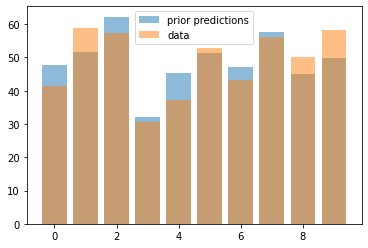

In [31]:
yields_pred_prior = sim.stan_variable("yields")
yields_pred_prior_means = np.mean(yields_pred_prior, axis=0)

t = list(range(N))

plt.bar(t, yields_pred_prior_means, alpha=0.5)
plt.bar(t, list(d["yields"]), alpha=0.5)
plt.legend(["prior predictions", "data"])
plt.show()

In [36]:
model_posterior = CmdStanModel(stan_file='oat_yield_posterior.stan')

fit = model_posterior.sample(data=dict(N=N, precipitation_june=d["pVI"], average_temperature_may=d["tV"], yields=d["yields"]), seed=42)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)




chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


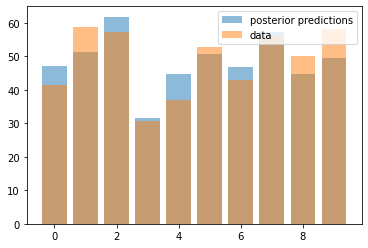

In [41]:
yields_pred_posterior = fit.stan_variable("yields_pred")
yields_pred_posterior_means = np.mean(yields_pred_posterior, axis=0)

plt.bar(t, yields_pred_posterior_means, alpha=0.5)
plt.bar(t, list(d["yields"]), alpha=0.5)
plt.legend(["posterior predictions", "data"])
plt.show()